# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The smartcab does not move at all during the simulation. The driving agent receives rewards while idling at a stop light. However, the driving agent is penalized when idling if the lights are green. The penalty for idling at a green light with no oncoming traffic is higher than idling at a red light (the correct behavior).

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

|File Name   | Answer |
|:-----------|:-------|
|agent.py| `num_dummies`:  changes the number of dummy agents. Default is 100. More agents probably means more computation is needed. <p>`grid_size`: changes the grid size of the simluation. Default size is 8 columns and 6 rows. Larger grid probably means more computation is needed. <p> `alpha`: determines the learning rate. The default is 0.5. It varies from 0 to 1. In the literature, `gamma` is used as the discount rate to discount future rewards, while `alpha` is used to calculate the instant reward. We are not using `gamma` in this project so we will have to use `alpha`.|
|environment.py| The `act` Environment class function maintains the state of the environment i.e. the SmartCab agent, other agents, the traffic lights, what the other agents are doing etc. It also rewards or penalizes the agent based on traffic laws.|
|simulator.py| `render()` renders the display of the simulation using the graphical user interface (GUI). Supplementary data is rendered as text in the terminal. `render_text()` prints the output to the terminal. In the `run()` class function, `render_text()` (line 186) is called before `render()` (line 190). `render_text()` should produce character output if a GUI is not present. |
|planner.py| This file contains routing code i.e. plans the course for the agent. At line 35, the code checks if the agent is already at the location. At line 39, it checks if the destination is East or West of the current location. At line 59, it checks if the destination is to the North or South of the current location. So the East–West code is considered before the North–South code. |

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


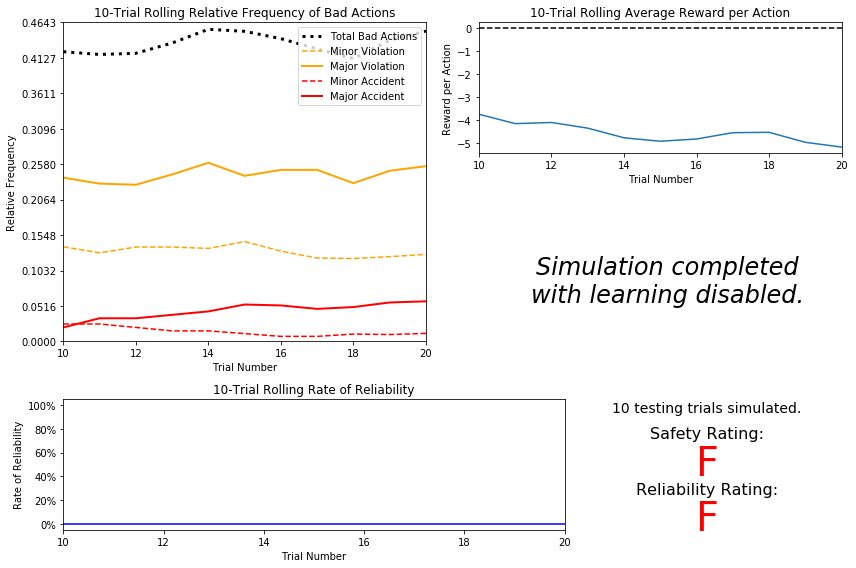

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

On the top left, in the chart of **10-Trial Rolling Relative Frequency of Bad Actions**, minor violations seem to be in a range between about 12% and 15%, major violations in a range between about 22% and 26%, minor accidents increasing from about 2.5% to about 5.5%, and major accidents decreasing from about 2.5% to about 1%. Total bad actions are exhibiting a wave–like form, ranging between about 41% and 46%.

On the top right, the chart of **10-Trial Rolling Average Reward per Action** shows that the reward per action is increasing in the negative direction of the y–axis. i.e. The agent is getting penalized more and more per action as the simulation goes on.

On the bottom left, the chart of **10–Trial Rolling Rate of Reliability**, the line is close to 0%.

Based on the **Safety Rating** and **Reliability Rating**, this agent received a grade of "F" for both categories, and is thus extremely unsafe and extremely unreliable for its passengers. It received an "F" for **Safety** because the "Agent causes at least one major accident, such as driving through a red light with cross-traffic". It received an "F" for **Reliability** because the "Agent fails to reach the destination on time for at least 60% of trips."

Given these two grades, the basic agent cannot be considered safe or reliable for its passenger(s).

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

Even though 'deadline' has an impact on efficiency, it was omitted because it is a continuous variable. The agent is penalized for the time it takes before reaching the destination. Thus it is implicit that the agent will strive to follow the nearest waypoint while obeying basic traffic rules, so 'waypoint' alone is sufficient to satisfy the efficiency requirement.

For safety, 'light' is very important. Moving forward on a red light will incur a major penalty. Since we can make a right turn if there is no vehicle on the left, we need to include 'left' as well. We can make a left turn on a green light if there is no 'oncoming' vehicle, so 'oncoming' is necessary. We can ignore the actions of the 'right' vehicle totally.


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Based on the features selected, the feature space is summarized in the table below:

| Feature | Number of states |
|:--------|:-----------------|
|light    |2 (red or green) |
|oncoming |4 (None, 'forward', 'left' or 'right')|
|left     |4 (None, 'forward', 'left' or 'right')|
|waypoint |3 ('forward','right' or 'left')|

Waypoint only has 3 states because a value of **None** means the destination has been reached and the training/test ends. Therefore there are 2\*4\*4\*3=**96** possible states. Since there are only 20 training trials, it may not be sufficient to learn a policy for each possible state.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

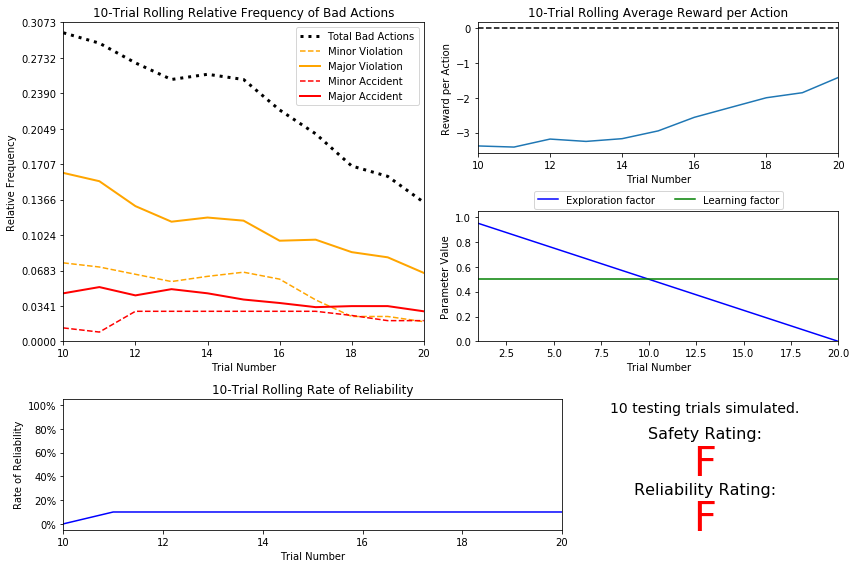

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

For the **10–Trial Rolling Relative Frequency of Bad Actions** chart, **minor violations** are decreasing from about 7% to about 1.8%. **Major violations** are decreasing from about 16% to about 6.8%. **Minor accidents** started off low at about 1.3% then leveled off and seems to be about constant about 1.7% and **major accidents** seems to be decreasing from about 4.5% to about 3.4%. **Total Bad Actions** is decreasing at a linear rate, starting from about 29% to 13% after 20 trials. This is a great improvement over the basic agent with no learning.

The **Total Bad Actions** line is trending downwards and the reward per action line is trending upwards in the **10–Trial Rolling Average Reward per Action**. These signs suggest that the model could be improved by running more training trials.

Epislon was initialized to have the value of 1. There were 20 training trials before the agent started testing. This is because the epsilon decay rate was fixed at 0.05 per training trial. The tolerance level was set at 0.05; this means that the agent will start training when epsilon falls below 0.05. We can confirm this by looking at the chart on the bottom right; the blue line which is the Exploration factor touches 0 when 20 trials are reached.

The **Safety** score is still an "F". That is because despite reducing the number of major accidents, as long as there was an occurrence of an major accident, it will receive an "F" grade. The **Reliability** rating is still an "F" because the agent "fails to reach the destination on time for at least 60% of trips."

Given these two grades, the basic learning agent cannot be considered safe or reliable for its passenger(s).

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

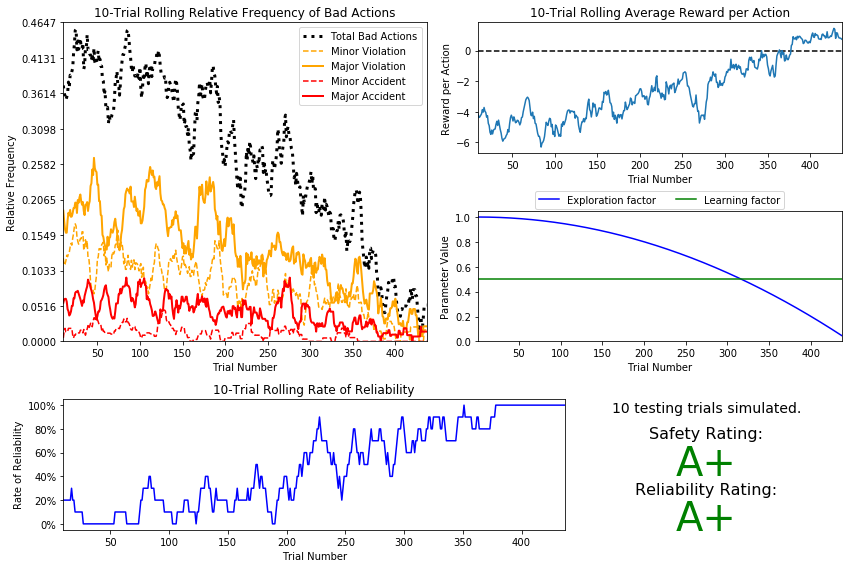

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

In the **10–Trial Rolling Relative Frequency of Bad Actions** panel, **minor violations**, **major violations**, **minor accidents** and **major accidents** all trended towards 0. Since **Total Bad Actions** is composed of these features, the line for **Total Bad Actions** also trended towards 0.

In the panel of **10–Trial Rolling Average Reward per Action**, the average reward was trending upwards and ended up positive after 400 training trials.

In the **10–Trial Rolling Rate of Reliability** panel, the rate of reliability was trending upwards and peaked at about 100% after about 400 training trials.

The decaying function used for epsilon was: 

```py
				self.epsilon = self.epsilon - 1.0 / 100000 * self.n_trials
```

With a tolerance of 0.05, this resulted in **437** training trials. Alpha was left unchanged at 0.5, as shown in the chart.

The epsilon decaying function was chosen because:

1. The agent should ideally visit every state in its state space multiple times, and the more times it visits a particular state, the more frequently it will update the maximum Q–value, making it better for the model.

2. In the beginning, the agent is mostly choosing random actions, and is rewarded based on the actions taken. So, the decaying function should produce a slow decaying rate in the early training trials, and a higher decay rate as epsilon gets nearer to the tolerance level. This is reflected in the function where n_trials is part of the equation. This is an example of a greedy exploration algorithm.

Compared to the earlier agents, this agent received an "A+" grade in **Safety** and an "A+" grade in **Reliability**.

Given these two grades, I'm satisfied with this agent.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 


The rules can be summarized in the table below:

|State        |None|Forward|Left|Right|
|:------------|:--:|:-----:|:--:|:---:|
|1. Red light | √  |       |    |     |
|2. Red light & left vehicle ≠ forward & waypoint = right |  |   |    | √ |
|3. Green light & oncoming vehicle = None |  | √ | √ | √ |
|4. Green light & oncoming vehicle = Forward |  | √ |  | √ |
|5. Green light & oncoming vehicle = Right |   | √ |  |  √ |
|6. Green light & oncoming vehicle = Left |  | √ | √ | √ |

1. Red light. The agent should stop at a red light, but see rule 2.
2. Red light and vehicle on the left is not going forward and the waypoint is on the right. The agent is allowed to make a right turn on red. It does not have to idle at a red light.
3. Green light and no oncoming vehicle. The agent is free to move forward, left or right.
4. Green light and oncoming vehicle moving forward. The agent can move forward or turn right, but cannot make a left turn. The oncoming vehicle has right of way.
5. Green light and oncoming vehicle turning right. The agent can move forward or turn right. It cannot make a left turn because there is only a single lane in the simulation and doing so would cause an accident.
6. Green light and oncoming vehicle turning left.  The agent can turn left or right. It can also drive forward since it has the right of way.


---

The state–tuple is organized in the following manner: **`light`**, **`oncoming`**, **`left`** and **`waypoint`**.

In the `sim_improved-learning.txt` file, there were certain policies that weren't the optimal policy. i.e. they did not have the highest Q–value in that particular state. For example:

```
Example of a state–entry where the correct action does not have the highest Q–value. The lights are green and the waypoint is to the left, but the oncoming vehicle is going forward. None should have the highest Q–value instead of left.
('green', 'forward', 'left', 'left')
 -- forward : 0.97
 -- None : -3.53
 -- right : 1.26
 -- left : 1.61
```

Based on our rules above, the highest Q–value should be **None**. However, `left` has the highest Q–value in this state.

Below are examples of a correct action given a particular state. i.e. optimal policy.
```
Example of a state–entry where the correct action has the highest Q–value. Given a green light and forward waypoint, the correct action is forward.
('green', 'left', None, 'forward')
 -- forward : 1.98
 -- None : -5.11
 -- right : 1.29
 -- left : 0.72


Lights are red, waypoint is forward. None is the correct action, and has the highest Q–value here.
('red', None, 'forward', 'forward')
 -- forward : -39.91
 -- None : 2.19
 -- right : -20.13
 -- left : -39.31

Lights are red, waypoint is on the right. Normally the agent can make a right turn, but the car on the left is going forward. Therefore None is the optimal policy.
('red', None, 'forward', 'right')
 -- forward : -40.63
 -- None : 1.09
 -- right : -19.75
 -- left : -40.71

Lights are green, waypoint is on the right. Make a right turn is the optimal policy.
('green', 'right', 'left', 'right')
 -- forward : 0.12
 -- None : -4.61
 -- right : 1.71
 -- left : -0.16
```

The following is an example of a non–optimal policy.

```
('green', 'forward', 'right', 'left')
 -- forward : 0.89
 -- None : -2.81
 -- right : 0.96
 -- left : 0.69

 ```
 
Given that the lights are green and oncoming traffic was moving forward, and the waypoint is left, **None** should have the highest Q–value but it does not. One reason why it could have been so may be because there were not enough visits to this state to update the Q–values accordingly.




-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

The environment is generated randomly at the start of each trial, i.e. starting position of smartcab, destination, location of other vehicles and traffic lights are random. This means that there is no way to propagate the unknown future reward into the learning algorithm.

Also, the correct immediate waypoint is generated for the agent. It is unable to perceive or plan for events that are in the future.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.